In [84]:
import pandas as pd

df = pd.read_csv('/content/modified_user_data.csv')
df.head()

,Timestamp,Age,Gender,Faculty,Year of study,Sleep(night),Exercise frequency,Frequent food,Fast food consumption frequency,Diet type,Food allergies,Weight,Height,Health conditions,Weekly spend for food,University canteen usage,Preferred Sri Lankan foods,Diet goal,Protein (g)
0,25/10/2024 10:10:08,24-26,Female,FAS,4th year,More than 8 hours,Never,"Traditional Sri Lankan food, Processed foods (...",2-3 times a week,No specific diet,Dryfish,40 - 49 kg,157cm,Gastritis,"More than 3,000 LKR",Daily,"Rice and curry, Hoppers",Better health,65
1,25/10/2024 10:19:28,24-26,Male,FAS,4th year,6-8 hours,1-2 times per week,Traditional Sri Lankan food,Never,No specific diet,NaN,80 - 89 kg,172cm,High cholesterol,"2,000 - 3,000 LKR",Daily,"Rice and curry, String hoppers",Manage health conditions,80
2,25/10/2024 14:30:21,24-26,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,NaN,50 - 59 kg,144cm,Gastritis,"1,000 - 2,000 LKR",Rarely/Never,"Rice and curry, Hoppers, Roti",Better health,65
3,25/10/2024 14:35:40,24-26,Male,FLFN,4th year,More than 8 hours,1-2 times per week,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,NaN,50 - 59 kg,175cm,NaN,"2,000 - 3,000 LKR",Daily,"Rice and curry, String hoppers, Kottu, Hoppers...",Better health,80
4,25/10/2024 14:59:37,24-26,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fruits and vegeta...",Once a week,No specific diet,NaN,40 - 49 kg,160cm,NaN,"2,000 - 3,000 LKR",Daily,"Rice and curry, Hoppers, Roti",Improve energy levels,65


In [85]:
# Drop the specific column
df = df.drop(columns=['Timestamp'])

In [86]:
df.describe()

,Protein (g)
count,565.000000
mean,72.601770
std,7.511858
min,60.000000
25%,65.000000
50%,80.000000
75%,80.000000
max,80.000000


In [87]:
# Check for missing values
df.isnull().sum()


,0
Age,0
Gender,0
Faculty,0
Year of study,0
Sleep(night),0
Exercise frequency,0
Frequent food,0
Fast food consumption frequency,0
Diet type,0
Food allergies,252


In [88]:
#fill with none
df["Food allergies"] = df["Food allergies"].fillna("None")


In [89]:
#fill with none
df["Health conditions"] = df["Health conditions"].fillna("None")


In [90]:
# Check for missing values
df.isnull().sum()


,0
Age,0
Gender,0
Faculty,0
Year of study,0
Sleep(night),0
Exercise frequency,0
Frequent food,0
Fast food consumption frequency,0
Diet type,0
Food allergies,0


In [91]:
# Check the unique values in the weight column
print(df['Age'].unique())


['24-26' '21-23' '27 and above' '18-20']


In [92]:
# Function to convert age range to the midpoint of the range or handle special cases
def convert_age_range(age_range):
    # Convert age_range to string to handle potential float values
    age_range = str(age_range)
    if 'and above' in age_range:
        # If the age is '27 and above', we assign it the value 27 or any reasonable value
        return 27
    elif ',' in age_range:
        # Handle cases like '23, 27 and above'
        age_parts = age_range.split(',')
        # Convert the first part to the integer and handle 'and above' case in the second part
        return (int(age_parts[0]) + 27) / 2  # Use 27 as the "midpoint" for "and above"
    elif '-' in age_range:
        start, end = age_range.split('-')
        return (int(start) + int(end)) / 2
    # Handle cases with nan string and other string convertible to int
    try:
        return int(age_range) # Handle other cases like single age values (e.g., '25')
    except ValueError:
        return float('nan')  # or any suitable value for missing/invalid ages
# Apply the conversion to the 'What is your age?' column
df['Age'] = df['Age'].apply(convert_age_range)

# Check the transformed data
print(df['Age'].head())

0    25.0
1    25.0
2    25.0
3    25.0
4    25.0
Name: Age, dtype: float64


In [93]:
# Check the unique values in the weight column
print(df['Weight'].unique())


['40 - 49 kg' '80 - 89 kg' '50 - 59 kg' '60 - 69 kg' '70 - 79 kg'
 'Below 40 kg' '90 - 99 kg' '100 kg or above']


In [94]:
# Function to convert weight values to numerical midpoints or approximate values
def convert_weight(weight):
    if '-' in weight:  # For ranges like '40 - 49 kg'
        start, end = weight.replace(' kg', '').split(' - ')
        return (int(start) + int(end)) / 2
    elif 'Below' in weight:  # For 'Below 40 kg'
        return 35  # Approximate value for "Below 40 kg"
    elif 'or above' in weight:  # For '100 kg or above'
        return 105  # Approximate value for "100 kg or above"
    else:
        return float(weight.replace(' kg', ''))  # Handle direct numeric weights

# Apply the function to the 'What is your current weight?' column
df['Weight'] = df['Weight'].apply(convert_weight)

# Check the transformed weight column
print(df['Weight'].head())


0    44.5
1    84.5
2    54.5
3    54.5
4    44.5
Name: Weight, dtype: float64


In [95]:
# Check unique values in the column
print(df['Height'].unique())


['157cm' '172cm' '144cm' '175cm' '160cm' '152cm' '150cm' '177cm' '163cm'
 '154cm' '155cm' '149cm' '156cm' '168cm' '161cm' '164 cm' '170cm' '178 cm'
 '162cm' '175' '176' '160' '158 CM' '153 cm' '170' '156' '174' '165' '164'
 '161 cm' '152.4' '148' '164cm' '152' '154' '180' '160 cm' '130cm' '170.6'
 '157' '173' '152 cm ' '154 cm' '166cm' '172' '165cm' '187' '150' '162'
 '155' '152 cm' '167' '163 cm' '159' '153' '158cm' '169' '168' '151 cm'
 '178' '151cm' '146' '173 cm' '150 cm' '176cm' '185' '148 cm' '163'
 '178cm' '146 cm' '167cm' '156cm ' '179' '189' '176 cm' '156 cm' '158'
 '169.5' '167.64' '174m' '171cm' '177' '149' '140cm' '168 cm' '183' '147']


In [96]:
# Function to clean the height column and convert it to numeric (in cm)
import re # Import the 're' module

def clean_height(height):
    # Remove any non-numeric characters (e.g., cm, CM, spaces)
    height_cleaned = re.sub(r"[^\d.]", "", height)
    return float(height_cleaned)  # Convert the remaining numeric value to float

# Apply the function to clean the 'What is your height (cm) ?' column
df['Height'] = df['Height'].apply(clean_height)

# Check the first few rows to verify the transformation
print(df['Height'].head())

0    157.0
1    172.0
2    144.0
3    175.0
4    160.0
Name: Height, dtype: float64


In [97]:
# Check unique values in the column
print(df['Weekly spend for food'].unique())


['More than 3,000 LKR' '2,000 - 3,000 LKR' '1,000 - 2,000 LKR'
 'Less than 1,000 LKR']


In [98]:
# Function to convert weekly spend ranges into numerical values
def convert_weekly_spend(spend):
    if '-' in spend:  # For ranges like '1,000 - 2,000 LKR'
        start, end = spend.replace(' LKR', '').replace(',', '').split(' - ')
        return (int(start) + int(end)) / 2
    elif 'More than' in spend:  # For 'More than 3,000 LKR'
        return 3500  # Approximate high value
    elif 'Less than' in spend:  # For 'Less than 1,000 LKR'
        return 750  # Approximate low value
    else:
        return float(spend.replace(' LKR', '').replace(',', ''))  # Handle direct numeric values

# Apply the function to the 'How much money do you spend on food per week?' column
df['Weekly spend for food'] = df['Weekly spend for food'].apply(convert_weekly_spend)

# Check the transformed column
print(df['Weekly spend for food'].head())


0    3500.0
1    2500.0
2    1500.0
3    2500.0
4    2500.0
Name: Weekly spend for food, dtype: float64


In [99]:
# Convert height to meters (from cm)
df['Height'] = df['Height'] / 100  # Convert cm to meters

# Function to calculate BMI
def calculate_bmi(row):
    height = row['Height']
    weight = row['Weight']
    if height > 0 and weight > 0:
        return weight / (height ** 2)
    else:
        return None  # Handle cases where height or weight might be zero or missing

# Apply BMI calculation
df['BMI'] = df.apply(calculate_bmi, axis=1)

# Check the updated BMI values
print(df[['Height', 'Weight', 'BMI']].head())


   Height  Weight        BMI
0    1.57    44.5  18.053471
1    1.72    84.5  28.562737
2    1.44    54.5  26.282793
3    1.75    54.5  17.795918
4    1.60    44.5  17.382812


In [100]:
# Check unique values in the column
print(df['Sleep(night)'].unique())


['More than 8 hours' '6-8 hours' '5-6 hours' 'Less than 5 hours']


In [101]:
df.head()

,Age,Gender,Faculty,Year of study,Sleep(night),Exercise frequency,Frequent food,Fast food consumption frequency,Diet type,Food allergies,Weight,Height,Health conditions,Weekly spend for food,University canteen usage,Preferred Sri Lankan foods,Diet goal,Protein (g),BMI
0,25.0,Female,FAS,4th year,More than 8 hours,Never,"Traditional Sri Lankan food, Processed foods (...",2-3 times a week,No specific diet,Dryfish,44.5,1.57,Gastritis,3500.0,Daily,"Rice and curry, Hoppers",Better health,65,18.053471
1,25.0,Male,FAS,4th year,6-8 hours,1-2 times per week,Traditional Sri Lankan food,Never,No specific diet,None,84.5,1.72,High cholesterol,2500.0,Daily,"Rice and curry, String hoppers",Manage health conditions,80,28.562737
2,25.0,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,None,54.5,1.44,Gastritis,1500.0,Rarely/Never,"Rice and curry, Hoppers, Roti",Better health,65,26.282793
3,25.0,Male,FLFN,4th year,More than 8 hours,1-2 times per week,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,None,54.5,1.75,None,2500.0,Daily,"Rice and curry, String hoppers, Kottu, Hoppers...",Better health,80,17.795918
4,25.0,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fruits and vegeta...",Once a week,No specific diet,None,44.5,1.60,None,2500.0,Daily,"Rice and curry, Hoppers, Roti",Improve energy levels,65,17.382812


In [102]:

# Function to convert sleep categories into numerical values
def convert_sleep(sleep):
    if 'More than' in sleep:  # For 'More than 8 hours'
        return 9  # Assigning a value slightly higher than 8
    elif 'Less than' in sleep:  # For 'Less than 5 hours'
        return 4  # Assigning a value slightly lower than 5
    elif '-' in sleep:  # For ranges like '6-8 hours' and '5-6 hours'
        # Use split('-') to handle both cases like '6-8 hours' and '5-6 hours'
        start, end = sleep.split('-')[:2]  # Split by '-' and take only the first two elements
        # Remove 'hours' text and strip any extra spaces
        start = int(start.replace(' hours', '').strip())
        end = int(end.replace(' hours', '').strip())
        return (start + end) / 2  # Take the average of the range
    else:
        # Handle cases like '7 hours' or any other single numeric value
        return int(sleep.replace(' hours', '').strip())

# Sample DataFrame with sleep data
data = pd.DataFrame({
    'Sleep(night)': ['More than 8 hours', '6-8 hours', '5-6 hours', 'Less than 5 hours']
})

# Apply the convert_sleep function to the 'Sleep(night)' column
data['Sleep(night)'] = data['Sleep(night)'].apply(convert_sleep)

# Print the DataFrame with converted sleep values
print(data)


   Sleep(night)
0           9.0
1           7.0
2           5.5
3           4.0


In [103]:
df.head()

,Age,Gender,Faculty,Year of study,Sleep(night),Exercise frequency,Frequent food,Fast food consumption frequency,Diet type,Food allergies,Weight,Height,Health conditions,Weekly spend for food,University canteen usage,Preferred Sri Lankan foods,Diet goal,Protein (g),BMI
0,25.0,Female,FAS,4th year,More than 8 hours,Never,"Traditional Sri Lankan food, Processed foods (...",2-3 times a week,No specific diet,Dryfish,44.5,1.57,Gastritis,3500.0,Daily,"Rice and curry, Hoppers",Better health,65,18.053471
1,25.0,Male,FAS,4th year,6-8 hours,1-2 times per week,Traditional Sri Lankan food,Never,No specific diet,None,84.5,1.72,High cholesterol,2500.0,Daily,"Rice and curry, String hoppers",Manage health conditions,80,28.562737
2,25.0,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,None,54.5,1.44,Gastritis,1500.0,Rarely/Never,"Rice and curry, Hoppers, Roti",Better health,65,26.282793
3,25.0,Male,FLFN,4th year,More than 8 hours,1-2 times per week,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,None,54.5,1.75,None,2500.0,Daily,"Rice and curry, String hoppers, Kottu, Hoppers...",Better health,80,17.795918
4,25.0,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fruits and vegeta...",Once a week,No specific diet,None,44.5,1.60,None,2500.0,Daily,"Rice and curry, Hoppers, Roti",Improve energy levels,65,17.382812


In [104]:
# Function to convert sleep categories into numerical values
def convert_sleep(sleep):
    if 'More than' in sleep:  # For 'More than 8 hours'
        return 9  # Assigning a value slightly higher than 8
    elif 'Less than' in sleep:  # For 'Less than 5 hours'
        return 4  # Assigning a value slightly lower than 5
    elif '-' in sleep:  # For ranges like '6-8 hours' and '5-6 hours'
        # Use split('-') to handle both cases like '6-8 hours' and '5-6 hours'
        start, end = sleep.split('-')[:2]  # Split by '-' and take only the first two elements
        # Remove 'hours' text and strip any extra spaces
        start = int(start.strip())
        end = int(end.replace(' hours', '').strip())
        return (start + end) / 2  # Take the average of the range
    else:
        # Handle cases like '7 hours' or any other single numeric value
        return int(sleep.replace(' hours', '').strip())

# Apply the convert_sleep function to the 'Sleep(night)' column
df['Sleep(night)'] = df['Sleep(night)'].apply(convert_sleep)

# Verify the transformed data
print(df[['Sleep(night)']].head())  # Display the first few rows of the transformed column


   Sleep(night)
0           9.0
1           7.0
2           7.0
3           9.0
4           7.0


In [106]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the numerical columns
numerical_columns = [
    'Age',
    'Sleep(night)',
    'BMI',
    'Height',
    'Weight',
    'Weekly spend for food',
    'Protein (g)'
]

# Initialize the scalers
scaler = StandardScaler()
normalizer = MinMaxScaler()

# Apply scaling (standardization) to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Apply normalization (MinMaxScaler) to the scaled columns (between 0 and 1)
df[numerical_columns] = normalizer.fit_transform(df[numerical_columns])

# Check the transformed data
print(df[numerical_columns].head())


    Age  Sleep(night)       BMI    Height    Weight  Weekly spend for food  \
0  0.75           1.0  0.118442  0.457627  0.135714               1.000000   
1  0.75           0.6  0.471774  0.711864  0.707143               0.636364   
2  0.75           0.6  0.395120  0.237288  0.278571               0.272727   
3  0.75           1.0  0.109783  0.762712  0.278571               0.636364   
4  0.75           0.6  0.095894  0.508475  0.135714               0.636364   

   Protein (g)  
0         0.25  
1         1.00  
2         0.25  
3         1.00  
4         0.25  


In [107]:
from sklearn.preprocessing import LabelEncoder

# List of columns to exclude from encoding
exclude_columns = ['Age', 'Sleep', 'Weight', 'Height', 'Weekly spend for food', 'Protein','BMI']

# Identify all categorical columns, excluding the specified ones
categorical_columns = [col for col in df.select_dtypes(include='object').columns if col not in exclude_columns]

# Initialize a dictionary to store LabelEncoders for each column (optional: for inverse transformation)
label_encoders = {}

# Apply label encoding to the selected categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle all cases
    label_encoders[col] = le

# Display the first few rows to confirm the encoding
print(df.head())

# Optionally, display the mappings for each encoded column
for col in categorical_columns:
    print(f"Encoding for {col}: {dict(zip(label_encoders[col].classes_, range(len(label_encoders[col].classes_))))}")


    Age  Gender  Faculty  Year of study  Sleep(night)  Exercise frequency  \
0  0.75       0        2              3           1.0                   3   
1  0.75       1        2              3           0.6                   0   
2  0.75       0        3              3           0.6                   3   
3  0.75       1        3              3           1.0                   0   
4  0.75       0        3              3           0.6                   3   

   Frequent food  Fast food consumption frequency  Diet type  Food allergies  \
0            192                                0          1               5   
1            157                                2          1              13   
2            163                                0          1              13   
3            160                                0          1              13   
4            180                                3          1              13   

     Weight    Height  Health conditions  Weekly spend f

In [108]:
df.head()

,Age,Gender,Faculty,Year of study,Sleep(night),Exercise frequency,Frequent food,Fast food consumption frequency,Diet type,Food allergies,Weight,Height,Health conditions,Weekly spend for food,University canteen usage,Preferred Sri Lankan foods,Diet goal,Protein (g),BMI
0,0.75,0,2,3,1.0,3,192,0,1,5,0.135714,0.457627,4,1.000000,1,138,0,0.25,0.118442
1,0.75,1,2,3,0.6,0,157,2,1,13,0.707143,0.711864,6,0.636364,1,176,3,1.00,0.471774
2,0.75,0,3,3,0.6,3,163,0,1,13,0.278571,0.237288,4,0.272727,4,143,0,0.25,0.395120
3,0.75,1,3,3,1.0,0,160,0,1,13,0.278571,0.762712,8,0.636364,1,186,0,1.00,0.109783
4,0.75,0,3,3,0.6,3,180,3,1,13,0.135714,0.508475,8,0.636364,1,143,2,0.25,0.095894


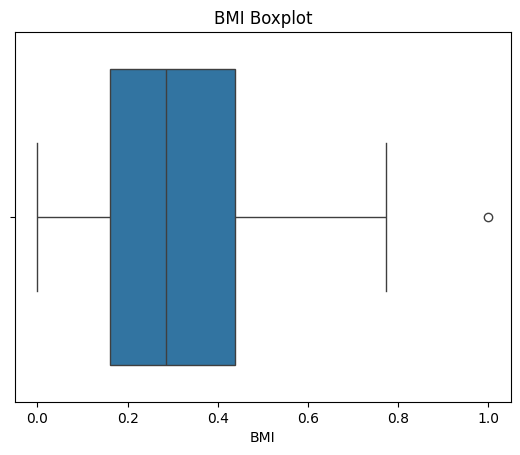

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize outliers in BMI
sns.boxplot(x=df['BMI'])
plt.title("BMI Boxplot")
plt.show()

In [110]:
# Calculate the IQR (Interquartile Range) for BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where BMI is outside the bounds
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]

# Display the outliers
print("Outliers in BMI:")
print(outliers[['Height', 'Weight', 'BMI']])


Outliers in BMI:
     Height  Weight  BMI
56  0.40678     1.0  1.0


In [111]:
# Remove rows where BMI is an outlier
df_no_outliers = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

# Display the cleaned data
print("Data without outliers:")
print(df_no_outliers[['Height', 'Weight', 'BMI']].head())


Data without outliers:
     Height    Weight       BMI
0  0.457627  0.135714  0.118442
1  0.711864  0.707143  0.471774
2  0.237288  0.278571  0.395120
3  0.762712  0.278571  0.109783
4  0.508475  0.135714  0.095894


In [112]:
# Save the preprocessed food data to a new CSV file
df.to_csv("preprocessed_dataset.csv", index=False)

print("User data preprocessed and saved successfully!")


User data preprocessed and saved successfully!


Train

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Separate features (X) and target (y)
X = df.drop('Protein (g)', axis=1)  # Replace 'target_column' with your target variable
y = df['Protein (g)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the target variable is in integer format
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification with sigmoid
])



# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5459 - loss: 3.3658 - val_accuracy: 0.4690 - val_loss: 2.1436
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5270 - loss: 2.3215 - val_accuracy: 0.4690 - val_loss: 1.2033
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4819 - loss: 2.4527 - val_accuracy: 0.4602 - val_loss: 1.4733
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5186 - loss: 1.9063 - val_accuracy: 0.4867 - val_loss: 1.0088
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4550 - loss: 1.9254 - val_accuracy: 0.4867 - val_loss: 0.9958
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4777 - loss: 1.6931 - val_accuracy: 0.5044 - val_loss: 0.7536
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5050 - loss: 1.4875 - val_accuracy: 0.5398 - val_loss: 0.7620
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5744 - loss: 1.2643 - val_accuracy: 0.5044 - val_loss: 1.1994
Ep

In [116]:
np.save('model.h5', model)

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Separate features (X) and target (y)
X = df.drop('Protein (g)', axis=1)  # Replace 'target_column' with your target variable
y = df['Protein (g)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the target variable is in integer format
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Drop 30% of neurons during training
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),  # Reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Maximum epochs
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.4823 - loss: 8.6044 - val_accuracy: 0.5487 - val_loss: 3.5534
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5250 - loss: 6.2096 - val_accuracy: 0.5929 - val_loss: 2.1700
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5003 - loss: 4.8890 - val_accuracy: 0.5133 - val_loss: 2.2385
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4987 - loss: 4.2696 - val_accuracy: 0.4956 - val_loss: 2.0392
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5411 - loss: 3.7337 - val_accuracy: 0.5133 - val_loss: 1.7615
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5049 - loss: 2.7247 - val_accuracy: 0.5310 - val_loss: 1.5559
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4548 - loss: 2.7804 - val_accuracy: 0.4779 - val_loss: 1.5707
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5091 - loss: 2.0807 - val_accuracy: 0.4956 - val_loss: 1.4

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# Separate features (X) and target (y)
X = df.drop('Protein (g)', axis=1)  # Replace 'target_column' with your target variable
y = df['Protein (g)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the target variable is in integer format
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# Define the neural network model

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.001),  # Reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Maximum epochs
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4754 - loss: 2.0457 - val_accuracy: 0.5398 - val_loss: 2.6082
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5744 - loss: 1.8663 - val_accuracy: 0.5841 - val_loss: 1.7589
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5433 - loss: 1.7326 - val_accuracy: 0.5398 - val_loss: 1.6065
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5983 - loss: 1.5961 - val_accuracy: 0.5575 - val_loss: 1.4753
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5214 - loss: 1.5252 - val_accuracy: 0.5575 - val_loss: 1.4129
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5101 - loss: 1.4922 - val_accuracy: 0.6195 - val_loss: 1.3573
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5581 - loss: 1.4502 - val_accuracy: 0.4956 - val_loss: 1.3492
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5713 - loss: 1.3213 - val_accuracy: 0.4956 - val_loss: 1.

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# Separate features (X) and target (y)
X = df.drop('Protein (g)', axis=1)  # Replace 'Protein (g)' with your target column name
y = df['Protein (g)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)  # Linear activation by default (no activation function here)
])

# Compile the model for regression
model.compile(optimizer=Adam(learning_rate=0.001),  # Learning rate adjusted
              loss='mean_squared_error',  # MSE for regression
              metrics=['mae'])  # Mean Absolute Error (MAE) as a metric

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 4.3156 - mae: 1.3862 - val_loss: 1.9569 - val_mae: 0.8324
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9409 - mae: 1.0544 - val_loss: 1.5527 - val_mae: 0.5478
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7752 - mae: 0.9980 - val_loss: 1.3745 - val_mae: 0.3977
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4006 - mae: 0.9043 - val_loss: 1.2640 - val_mae: 0.3047
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3327 - mae: 0.8760 - val_loss: 1.2241 - val_mae: 0.2727
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0812 - mae: 0.7938 - val_loss: 1.2070 - val_mae: 0.2636
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9880 - mae: 0.7395 - val_loss: 1.2030 - val_mae: 0.2588
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9774 - mae: 0.7431 - val_loss: 1.2026 - val_mae: 0.2664
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9934 - mae

In [120]:
model.save('proteing_predictor_model.h5')

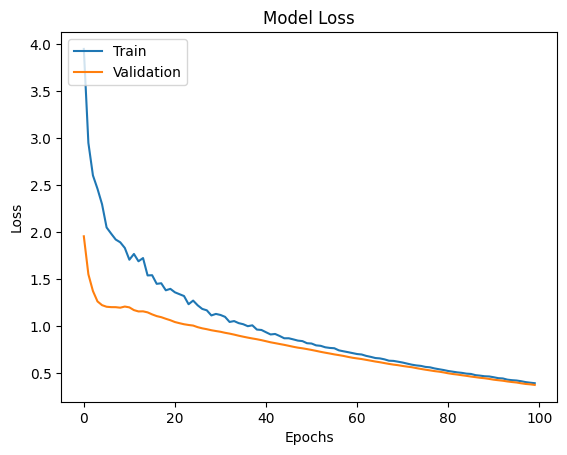

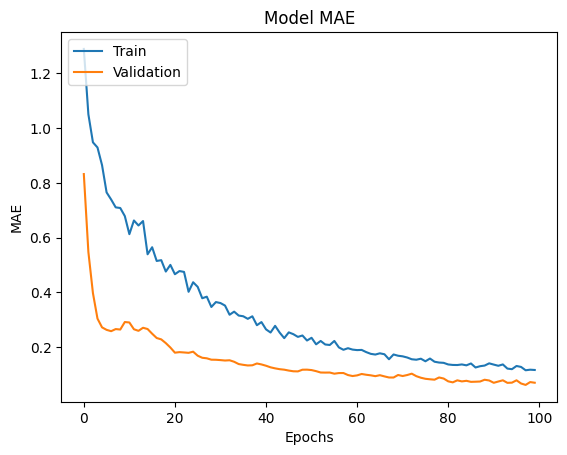

In [121]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [122]:
# Make predictions on the test set
y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


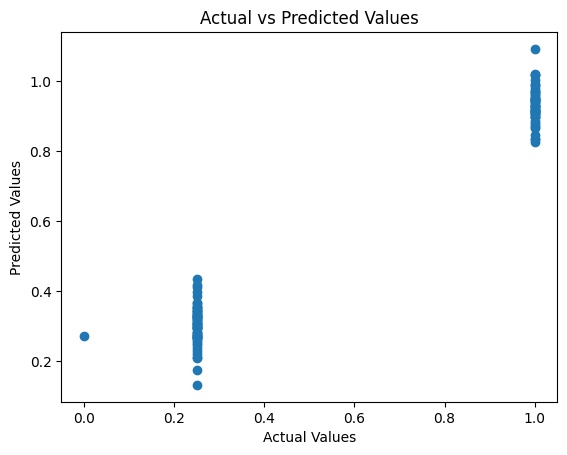

In [123]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for regression
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [126]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model
model = load_model('/content/proteing_predictor_model.h5')

# Your test input data (make sure it's in the same format as used during training)
test_input = np.array([[0.75, 0, 2, 3, 1, 3, 192, 0, 1, 5, 0.135714286, 0.457627119, 4, 1, 1, 138, 0, 0.118442103]])

# If you used scaling during training, apply the same scaling here (e.g., MinMaxScaler)
# test_input_scaled = scaler.transform(test_input)  # Uncomment if scaling was used

# Make a prediction with the model
protein_prediction = model.predict(test_input)

# Print the predicted protein value
print(f"Predicted Protein content: {protein_prediction[0][0]:.2f} g")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Protein content: -1.22 g
